In [3]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
import random

## Bayesian Binary Hypothesis Testing

You flip a coin 8 times and it comes up heads every times. If this were a fair coin, the probability of this occurring is

In [1]:
0.5**8

0.00390625

You have heard of two-headed coins. Without checking the coin, should you believe that it is two-headed? 

Let:

**F** = event the coin is fair

**E** = event that coin comes up heads 8 times out of 8

We are asked to find $P(F|E)$

What type of probability is this?

It is an *a posteriori* probability. 

Do we know this probability? What do we know?

No, we don't know it. We only know the **likelihoods**

How can we determine $P(F|E)$?



1. We can run a simulation of the system

2. We can calculate it using Bayes' rule

We need the *a priori* probabilities, but there is no way for us to know the true *a prioris*. So what to do?

We will have to choose the *a prioris*. How? There are 2 typical approaches:

1. **Uninformative prior**: We choose a prior that basically assumes as little information about the inputs as possible. For discrete inputs, this will often be equally likely probabilities

2. **Informative prior**: We choose a prior based on other knowledge of the problem.

### Uninformative Prior

Let's assume that the probabilities that coin is fair or two-headed are equally likely:

In [4]:
num_sims=1000000
flips=8
event_count=0
fair_count=0

cointypes=['fair','twohead']
for sim in range(num_sims):
    cointype=random.choice(cointypes)
    if cointype=='fair':
        faces=['H','T']
    else:
        faces=['H','H']
    coins=random.choices(faces,k=flips)
    num_heads=coins.count('H')
    if num_heads==flips:
        event_count+=1
        if cointype=='fair':
            fair_count+=1
            
print("Prob. of fair coin given that",flips,"heads observed is",fair_count/event_count)

Prob. of fair coin given that 8 heads observed is 0.003930324794080831


It is very unlikely that the coin was fair, under this uninformative prior.

In [5]:
num_sims=1000000
flips=8
events=[]

cointypes=['fair','twohead']
for sim in range(num_sims):
    cointype=random.choice(cointypes)
    if cointype=='fair':
        faces=['H','T']
    else:
        faces=['H','H']
    coins=random.choices(faces,k=flips)
    num_heads=coins.count('H')
    if num_heads==flips:
        events+=[cointype]

In [7]:
events.count('fair')/len(events)

0.0039023982119486293

In [8]:
events.count('twohead')/len(events)

0.9960976017880514

<BarContainer object of 2 artists>

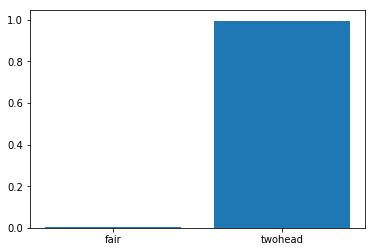

In [9]:
plt.bar(cointypes,[events.count('fair')/len(events),events.count('twohead')/len(events)])

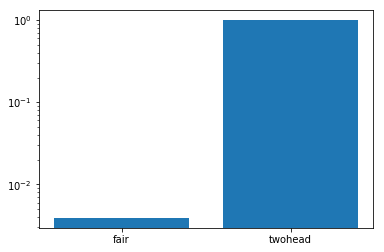

In [10]:
plt.bar(cointypes,[events.count('fair')/len(events),events.count('twohead')/len(events)])
plt.yscale('log')

## Informative prior

What if you believe that before you observed the outcome, you thought the probability that the coin was fair was at least 99/100?

<BarContainer object of 2 artists>

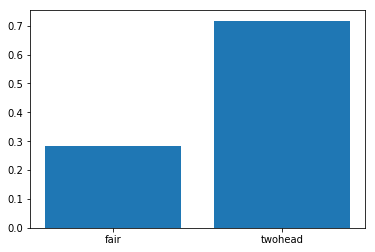

In [13]:
num_sims=1000000
flips=8
events=[]

cointypes=['fair']*99+['twohead']
for sim in range(num_sims):
    cointype=random.choice(cointypes)
    if cointype=='fair':
        faces=['H','T']
    else:
        faces=['H','H']
    coins=random.choices(faces,k=flips)
    num_heads=coins.count('H')
    if num_heads==flips:
        events+=[cointype]
        

plt.bar(['fair','twohead'],[events.count('fair')/len(events),\
                            events.count('twohead')/len(events)])


What if you believe that before you observed the outcome, you thought the probability that the coin was fair was at least 999/1000?

<BarContainer object of 2 artists>

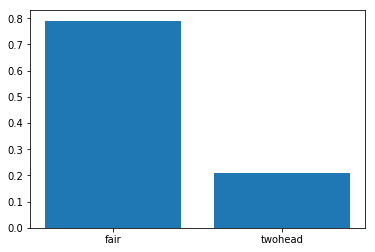

In [14]:
num_sims=1000000
flips=8
events=[]

cointypes=['fair']*999+['twohead']
for sim in range(num_sims):
    cointype=random.choice(cointypes)
    if cointype=='fair':
        faces=['H','T']
    else:
        faces=['H','H']
    coins=random.choices(faces,k=flips)
    num_heads=coins.count('H')
    if num_heads==flips:
        events+=[cointype]
        

plt.bar(['fair','twohead'],[events.count('fair')/len(events),\
                            events.count('twohead')/len(events)])



Why is the result like this? 

The evidence that the coin is not fair is pretty strong -- the chance of getting 8 heads on 8 flips is very small. However, the probability of having a two-head coin is also very,very small.

What prior makes it equally likely for the coin to be fair or two-headed?

<BarContainer object of 2 artists>

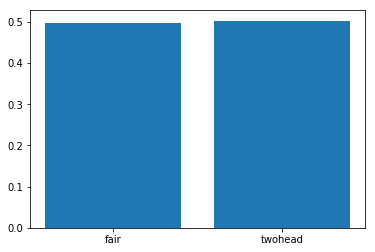

In [16]:
num_sims=1000000
flips=8
events=[]

cointypes=['fair']*256+['twohead']
for sim in range(num_sims):
    cointype=random.choice(cointypes)
    if cointype=='fair':
        faces=['H','T']
    else:
        faces=['H','H']
    coins=random.choices(faces,k=flips)
    num_heads=coins.count('H')
    if num_heads==flips:
        events+=[cointype]
        

plt.bar(['fair','twohead'],[events.count('fair')/len(events),\
                            events.count('twohead')/len(events)])




## Extending the set of a prioris

Coins do not have to just be fair or two-sided. The can can land on one side more than the other. Let's allow the probability of heads to vary from 0 to 1 by 0.01:

In [17]:
np.linspace(0,1,101)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [25]:
def exactcoins(flips=8, target=-1, num_sims=100000):
    
    if target==-1:
        target=flips
        
    allcoins=np.linspace(0,1,101)
    
    events=[]
    for sim in range(num_sims):
        prob_heads=npr.choice(allcoins)
        R=npr.uniform(size=flips)
        num_heads=np.sum(R<prob_heads)
        if num_heads==target:
            events+=[prob_heads]
            
    vals,counts=np.unique(events,return_counts=True)
    plt.bar(vals,counts/len(events),width=0.01)
    
    return events

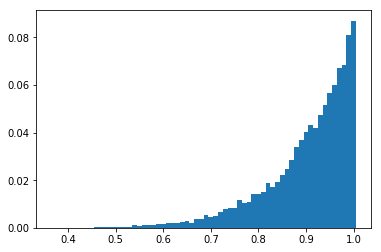

In [26]:
_=exactcoins()

What is your conclusion?

To explore this any further, we'll need to extend our tools for modeling random phenomena: